# EDA and Feature Engineering/Selectin

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter
from datetime import datetime

### Slice Dataset to Desired Data Range

In [8]:
# accidents = pd.read_csv('data/chi_traffic_accidents.csv')

# start_date = datetime(2017, 9, 1)
# end_date = datetime(2020, 3, 1)
# accidents['crash_date'] = pd.to_datetime(accidents['CRASH_DATE'])
# accidents = accidents[(start_date <= accidents['crash_date']) & (accidents['crash_date'] < end_date)].copy()

# accidents.to_csv('data/chi_traffic_accidents_sub.csv')

### Import Revised Dataset

In [56]:
accidents = pd.read_csv('data/chi_traffic_accidents_sub.csv', parse_dates=['crash_date'])

In [57]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293075 entries, 0 to 293074
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     293075 non-null  int64         
 1   CRASH_RECORD_ID                293075 non-null  object        
 2   RD_NO                          293075 non-null  object        
 3   CRASH_DATE_EST_I               20235 non-null   object        
 4   CRASH_DATE                     293075 non-null  object        
 5   POSTED_SPEED_LIMIT             293075 non-null  int64         
 6   TRAFFIC_CONTROL_DEVICE         293075 non-null  object        
 7   DEVICE_CONDITION               293075 non-null  object        
 8   WEATHER_CONDITION              293075 non-null  object        
 9   LIGHTING_CONDITION             293075 non-null  object        
 10  FIRST_CRASH_TYPE               293075 non-null  object        
 11  

## UDF

In [58]:
def plot_null_val_heatmap(df, plot_title, figsize):
    '''
    Identifies null values within a dataframe.
    
    Args:
        df (dataframe) : Dataset to evaluate null values.
        plot_title(str) : Title of heatmap.
        figsize (tuple) : Plot dimensions
    
    Return:
        None
    
    '''
    
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    ax.set_title(plot_title, fontsize=20)
    fig.tight_layout();

def time_of_day(hour):
    '''
    Returns the time period, e.g. morning, based on hour of the day.
    
    '''
    if hour >= 5 and hour < 10:
        time_period = 'morning'
    elif hour >=10 and hour < 18:
        time_period = 'day'
    elif hour >=18 and hour < 21:
        time_period = 'evening'
    else:
        time_period = 'night'
    
    return time_period

def display_bar_plot(data, x, title, figsize=(6,4), hue=None):
    '''
    Displays a vertial bar plot.
    '''
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(data=data,x=x, hue=hue,  ax=ax)
    ax.set_title(title, fontsize=16)
    fig.tight_layout();

def plot_density_distribution_by_class(df, class_col, feature_name, figsize, title):
    '''
    Generates a density distribution plot by class for the selected feature.
    '''
    fatal_arr = df[df[class_col] == 1][feature_name].values
    not_fatal_arr = df[df[class_col] == 0][feature_name].values


    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.kdeplot(fatal_arr, shade=True, color="b",  label = 'Fatal / Incapacitated')
    ax = sns.kdeplot(not_fatal_arr, shade=True, color="r", label = 'Not Severe')
    ax.legend()
    ax.set_title(title, fontsize=18)
    fig.tight_layout();

def create_is_weekend_feature(day_of_week):
    '''
    Return 1 if day_of_week is Saturday or Sunday.
    '''
    if day_of_week == 1 or day_of_week == 0:
        return 1
    else:
        return 0

def create_has_snow_ice_feature(condition):
    '''
    Return 1 if day_of_week is Saturday or Sunday.
    '''
    if condition == 'ICE' or day_of_week == 0:
        return 1
    else:
        return 0

### Feature Engineering

In [59]:
accidents['crash_year'] = accidents['crash_date'].dt.year
accidents['crash_month'] = accidents['crash_date'].dt.month
accidents['is_fatal'] = np.where(accidents['MOST_SEVERE_INJURY'] == 'FATAL', 1, 0)
accidents['is_incap'] = np.where(accidents['MOST_SEVERE_INJURY'] == 'INCAPACITATING INJURY', 1, 0)
accidents['is_fatal_or_incap'] = accidents['is_fatal'] + accidents['is_incap']



In [60]:
# Removed columsn because data is administrative or describes the resulting injuries.
cols_to_drop = ['CRASH_DATE_EST_I', 'CRASH_RECORD_ID', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'Unnamed: 0',
               'CRASH_RECORD_ID', 'is_fatal', 'is_incap', 'CRASH_MONTH', 'INJURIES_REPORTED_NOT_EVIDENT', 'DAMAGE', 'REPORT_TYPE',
               'DATE_POLICE_NOTIFIED', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_FATAL', 'INJURIES_TOTAL', 'INJURIES_INCAPACITATING',
               'INJURIES_NON_INCAPACITATING', 'INJURIES_NO_INDICATION', 'LATITUDE', 'LONGITUDE']

accidents.drop(cols_to_drop, axis=1, inplace=True)

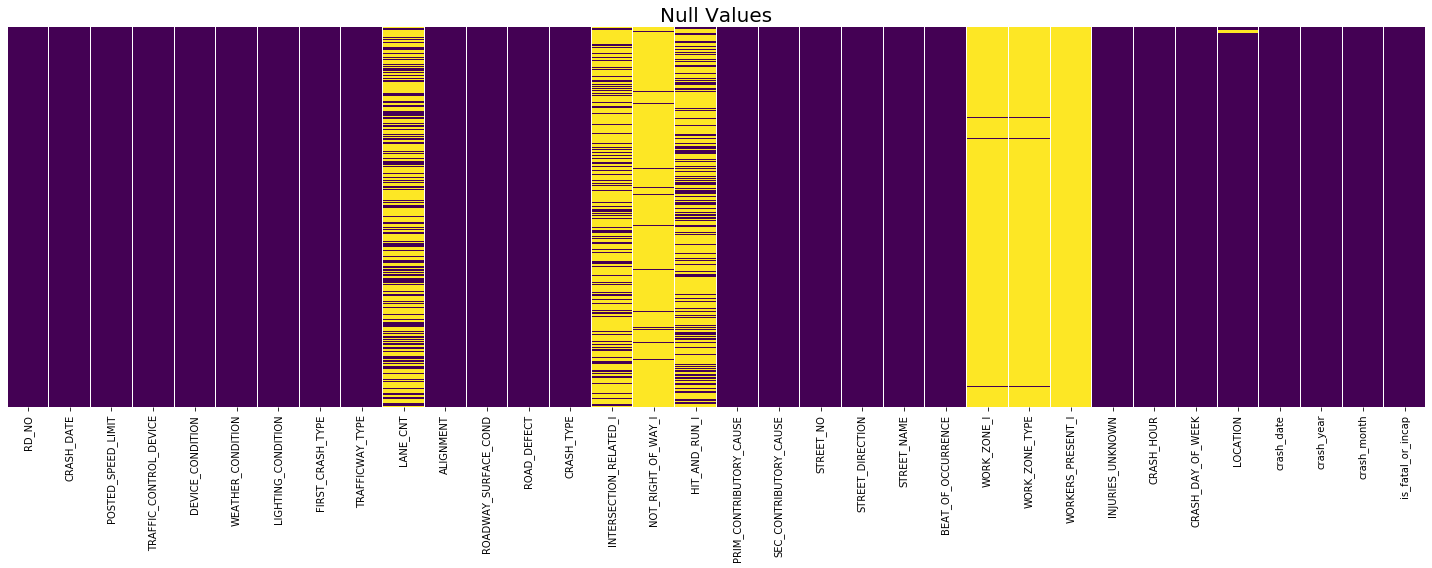

In [61]:
plot_null_val_heatmap(accidents, "Null Values", figsize=(20,8))

In [62]:
accidents['time_of_day'] = accidents['CRASH_HOUR'].apply(lambda x: time_of_day(x))
accidents['is_weekend'] = accidents['CRASH_DAY_OF_WEEK'].apply(lambda x: create_is_weekend_feature(x))

---
## Unique Values for Features

In [65]:
for col in sorted(accidents['TRAFFIC_CONTROL_DEVICE'].unique()):
    print(col)

BICYCLE CROSSING SIGN
DELINEATORS
FLASHING CONTROL SIGNAL
LANE USE MARKING
NO CONTROLS
NO PASSING
OTHER
OTHER RAILROAD CROSSING
OTHER REG. SIGN
OTHER WARNING SIGN
PEDESTRIAN CROSSING SIGN
POLICE/FLAGMAN
RAILROAD CROSSING GATE
RR CROSSING SIGN
SCHOOL ZONE
STOP SIGN/FLASHER
TRAFFIC SIGNAL
UNKNOWN
YIELD


In [66]:
for col in sorted(accidents['DEVICE_CONDITION'].unique()):
    print(col)

FUNCTIONING IMPROPERLY
FUNCTIONING PROPERLY
MISSING
NO CONTROLS
NOT FUNCTIONING
OTHER
UNKNOWN
WORN REFLECTIVE MATERIAL


In [67]:
for col in sorted(accidents['WEATHER_CONDITION'].unique()):
    print(col)

BLOWING SAND, SOIL, DIRT
BLOWING SNOW
CLEAR
CLOUDY/OVERCAST
FOG/SMOKE/HAZE
FREEZING RAIN/DRIZZLE
OTHER
RAIN
SEVERE CROSS WIND GATE
SLEET/HAIL
SNOW
UNKNOWN


In [68]:
for col in sorted(accidents['LIGHTING_CONDITION'].unique()):
    print(col)

DARKNESS
DARKNESS, LIGHTED ROAD
DAWN
DAYLIGHT
DUSK
UNKNOWN


In [69]:
for col in sorted(accidents['FIRST_CRASH_TYPE'].unique()):
    print(col)

ANGLE
ANIMAL
FIXED OBJECT
HEAD ON
OTHER NONCOLLISION
OTHER OBJECT
OVERTURNED
PARKED MOTOR VEHICLE
PEDALCYCLIST
PEDESTRIAN
REAR END
REAR TO FRONT
REAR TO REAR
REAR TO SIDE
SIDESWIPE OPPOSITE DIRECTION
SIDESWIPE SAME DIRECTION
TRAIN
TURNING


In [70]:
for col in sorted(accidents['TRAFFICWAY_TYPE'].unique()):
    print(col)

ALLEY
CENTER TURN LANE
DIVIDED - W/MEDIAN (NOT RAISED)
DIVIDED - W/MEDIAN BARRIER
DRIVEWAY
FIVE POINT, OR MORE
FOUR WAY
L-INTERSECTION
NOT DIVIDED
NOT REPORTED
ONE-WAY
OTHER
PARKING LOT
RAMP
ROUNDABOUT
T-INTERSECTION
TRAFFIC ROUTE
UNKNOWN
UNKNOWN INTERSECTION TYPE
Y-INTERSECTION


In [71]:
for col in sorted(accidents['ALIGNMENT'].unique()):
    print(col)

CURVE ON GRADE
CURVE ON HILLCREST
CURVE, LEVEL
STRAIGHT AND LEVEL
STRAIGHT ON GRADE
STRAIGHT ON HILLCREST


In [72]:
for col in sorted(accidents['ROADWAY_SURFACE_COND'].unique()):
    print(col)

DRY
ICE
OTHER
SAND, MUD, DIRT
SNOW OR SLUSH
UNKNOWN
WET


---
## EDA

Percent Resulting in Fatality or Incapacitation: 1.879%




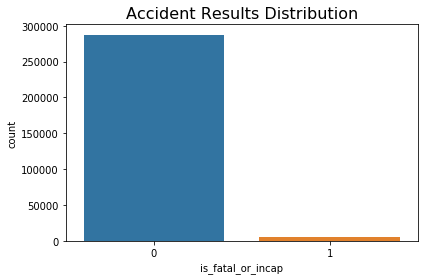

In [38]:
display_bar_plot(accidents, 'is_fatal_or_incap', 'Accident Results Distribution')

print('Percent Resulting in Fatality or Incapacitation: {0:.3%}'.format(sum(accidents['is_fatal_or_incap']) / len(accidents['is_fatal_or_incap'])))
print('\n')

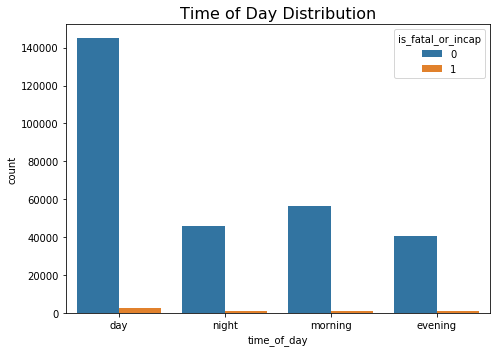

In [39]:
display_bar_plot(accidents, 'time_of_day', 'Time of Day Distribution', figsize=(7,5), hue='is_fatal_or_incap')

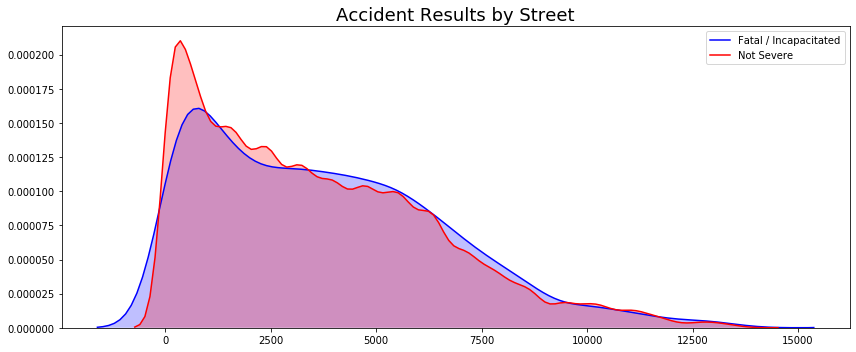

In [45]:
plot_density_distribution_by_class(accidents, 'is_fatal_or_incap', 'STREET_NO', (12,5), 'Accident Results by Street')

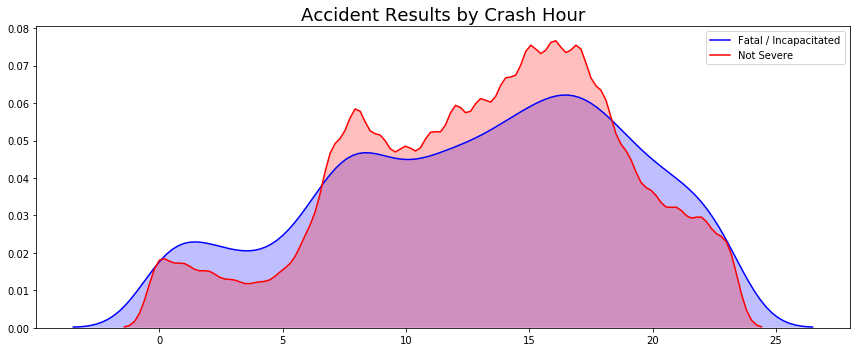

In [46]:
plot_density_distribution_by_class(accidents, 'is_fatal_or_incap', 'CRASH_HOUR', (12,5), 'Accident Results by Crash Hour')

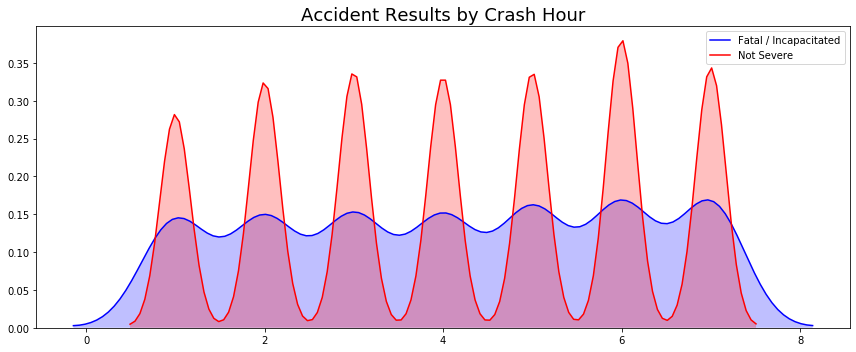

In [48]:
# Sunday = 1
plot_density_distribution_by_class(accidents, 'is_fatal_or_incap', 'CRASH_DAY_OF_WEEK', (12,5), 'Accident Results by Crash Hour')